Héctor Asorey de Pablos

<hr>

# PRÁCTICA 2: CLASIFICACIÓN

<hr>

Se plantea un problema de clasificación multiclase (3 clases) a resolver con alguno de los algoritmos o meta-algoritmos de aprendizaje vistos en clase.

Para esta tarea, se utilizará el dataset "star_class_clean.csv", que contiene 100000 observaciones del espacio tomadas por el SDSS (Sloan Digital Sky Survey) y que clasifica estas observaciones en 3 tipos, que son: Galxia, Estrella o Cuasar (galaxia recién nacida).

El dataset contiene 13 variables, que son las siguientes:

* alpha: ángulo de ascensión (float)
* delta: ángulo de declinación (float)
* u: filtro ultravioleta (float)
* g: filtro verde (float)
* r: filtro rojo (float)
* i: filtro infrarrojo cercano (float)
* z: filtro infrarrojo (float)
* field_ID: número de campo para identificar cada campo (int)
* spec_obj_ID: ID único utilizado para objetos espectroscópicos ópticos (int)
* redshift: valor redshift basado en el aumento de la longitud de onda (float)
* plate: identifica cada placa en SDSS (int)
* MJD: fecha juliana (float)
* fiber_ID: ID de fibra que identifica la fibra que apuntó la luza al plano focal en cada observación
* class: clase del objeto (galaxy, star, quasar object)

Este Dataset ha sido descargado de Kaggle y se han eliminado las columnas que no son relevantes para resolver el problema de clasificación. 

Fuente del Dataset:https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

<hr>

### 1. LECTURA DE DATOS Y VISUALIZACIÓN DE LA DISTRIBUCIÓN DE LAS CLASES A CLASIFICAR



In [1]:
import pandas as pd

dataframe = pd.read_csv('./data/star_class_clean.csv')
dataframe

,alpha,delta,u,g,r,i,z,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID,class
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,6.543777e+18,0.634794,5812,56354,171,GALAXY
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,1.176014e+19,0.779136,10445,58158,427,GALAXY
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,5.152200e+18,0.644195,4576,55592,299,GALAXY
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,1.030107e+19,0.932346,9149,58039,775,GALAXY
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,6.891865e+18,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,581,1.055431e+19,0.000000,9374,57749,438,GALAXY
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,289,8.586351e+18,0.404895,7626,56934,866,GALAXY
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,308,3.112008e+18,0.143366,2764,54535,74,GALAXY
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,131,7.601080e+18,0.455040,6751,56368,470,GALAXY


In [2]:
dataframe['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [3]:
print(f'Número de valores únicos en field_ID: {len(dataframe["field_ID"].unique())}')
print(f'Número de valores únicos en spec_obj_ID: {len(dataframe["spec_obj_ID"].unique())}')
print(f'Número de valores únicos en redshift: {len(dataframe["redshift"].unique())}')
print(f'Número de valores únicos en plate: {len(dataframe["plate"].unique())}')      
print(f'Número de valores únicos en fiber_ID: {len(dataframe["fiber_ID"].unique())}')      

Número de valores únicos en field_ID: 856
Número de valores únicos en spec_obj_ID: 100000
Número de valores únicos en redshift: 99295
Número de valores únicos en plate: 6284
Número de valores únicos en fiber_ID: 1000


Nº de elementos de la clase Galaxia: 59445
Nº de elementos de la clase Cuasar: 18961
Nº de elementos de la clase Estrella: 21594


<AxesSubplot:xlabel='class', ylabel='Probability'>

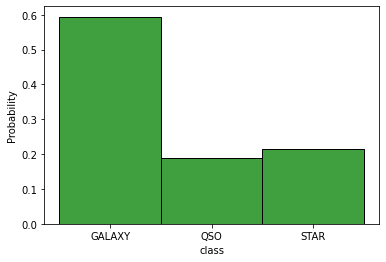

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Nº de elementos de la clase Galaxia: {}'.format(np.count_nonzero(dataframe['class'] == 'GALAXY')))
print('Nº de elementos de la clase Cuasar: {}'.format(np.count_nonzero(dataframe['class'] == 'QSO')))
print('Nº de elementos de la clase Estrella: {}'.format(np.count_nonzero(dataframe['class'] == 'STAR')))

sns.histplot(data=dataframe, x="class", discrete=True, stat='probability', bins=2, color = 'green')

<hr>

### 2. TRANSFORMACIÓN DE LOS DATOS



In [5]:
dataframe.dtypes

alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
field_ID         int64
spec_obj_ID    float64
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
class           object
dtype: object

In [6]:
dataframe = dataframe.drop(['spec_obj_ID'], axis = 1)

In [7]:
from sklearn import preprocessing

classValues = dataframe['class'].values

le = preprocessing.LabelEncoder()     
classLabelized = le.fit_transform(classValues)

dataframe['class'] = classLabelized

In [8]:
dataframe['class'].unique()

array([0, 1, 2])

<hr>

### 3. EVALUACIÓN HOLD-OUT



In [9]:
from sklearn.model_selection import train_test_split

X = dataframe.drop('class', axis=1, inplace=False).values
y = dataframe['class'].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<hr>

### 4. OVERSAMPLING



In [10]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy='auto', 
                   k_neighbors=10, 
                   random_state=0)
X_over, y_over = oversample.fit_resample(X, y)

print('Nº de elementos de la clase 0: {}'.format(np.count_nonzero(y_over == 0)))
print('Nº de elementos de la clase 1: {}'.format(np.count_nonzero(y_over == 1)))
print('Nº de elementos de la clase 2: {}'.format(np.count_nonzero(y_over == 2)))

df_over = pd.DataFrame(np.append(X_over ,y_over.reshape(-1,1), axis=1),
                       columns=[dataframe.columns.tolist()]).astype({"class": int})

Nº de elementos de la clase 0: 59445
Nº de elementos de la clase 1: 59445
Nº de elementos de la clase 2: 59445


In [11]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='auto', 
                                 random_state=0)
X_under, y_under = undersample.fit_resample(X, y)

print('Nº de elementos de la clase 0: {}'.format(np.count_nonzero(y_under == 0)))
print('Nº de elementos de la clase 1: {}'.format(np.count_nonzero(y_under == 1)))
print('Nº de elementos de la clase 2: {}'.format(np.count_nonzero(y_under == 2)))

Nº de elementos de la clase 0: 18961
Nº de elementos de la clase 1: 18961
Nº de elementos de la clase 2: 18961


Se ha hecho una prueba de realizar Undersampling para comprobar qué cantidad de datos se perderían respecto al dataframe original

<hr>

### 5. ENTRENAMIENTO DE LOS MODELOS



In [12]:
import time

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

modelos = {'Gaussian Naive Bayes': GaussianNB(),
           'Decision Tree with Gini and Oversampling': DecisionTreeClassifier(criterion='gini', max_depth=5),
           'Decision Tree with Gini and Class Weights': DecisionTreeClassifier(criterion='gini', max_depth=5, class_weight = "balanced"),
           'KNN with 100 neighbours': KNeighborsClassifier(n_neighbors=100)}
           #'Decision Tree': MultinomialNB(),
           #'SVM': BernoulliNB()}

start_time = time.time()

# Ajustamos los modelos
for k, v in modelos.items():
    train_start_time = time.time()
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    if k == 'Decision Tree with Gini and Class Weights':
        v.fit(X, y)
    else:
        v.fit(X_over, y_over)
    print(f"El modelo {k} ha tardado en entrenar: {time.time() - train_start_time} segundos\n")
    
end_time = time.time()
print(f"\nTiempo total empleado para entrenar todos los modelos: {end_time - start_time} segundos")

CREANDO MODELO: Gaussian Naive Bayes
El modelo Gaussian Naive Bayes ha tardado en entrenar: 0.04606199264526367 segundos

CREANDO MODELO: Decision Tree with Gini and Oversampling
El modelo Decision Tree with Gini and Oversampling ha tardado en entrenar: 1.1240899562835693 segundos

CREANDO MODELO: Decision Tree with Gini and Class Weights
El modelo Decision Tree with Gini and Class Weights ha tardado en entrenar: 0.8058326244354248 segundos

CREANDO MODELO: KNN with 100 neighbours
El modelo KNN with 100 neighbours ha tardado en entrenar: 0.7654404640197754 segundos


Tiempo total empleado para entrenar todos los modelos: 2.741425037384033 segundos


<hr>

### 6. EVALUACIÓN DE LOS MODELOS



In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

evaluacion = list()

start_time = time.time()

for k, v in modelos.items():
    eval_start_time = time.time()
    print ('EVALUANDO MODELO: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred = v.predict(X)
    y_proba = v.predict_proba(X)
    model['accuracy'] = accuracy_score(y_true=y, y_pred=y_pred)
    model['precision'] = precision_score(y_true=y, y_pred=y_pred, average='macro')
    model['recall'] = recall_score(y_true=y, y_pred=y_pred, average='macro')
    model['f1'] = f1_score(y_true=y, y_pred=y_pred, average='macro')
    print(f"El modelo {k} ha tardado en ser evaluado: {time.time() - eval_start_time} segundos\n")
    evaluacion.append(model)
    
end_time = time.time()
print(f"\nTiempo total empleado para evaluar todos los modelos: {end_time - start_time} segundos")

# Pasamos los resultados a un DataFrame para visualizarlos mejor
df = pd.DataFrame.from_dict(evaluacion)
df.set_index("name", inplace=True)
df.head()

EVALUANDO MODELO: Gaussian Naive Bayes
El modelo Gaussian Naive Bayes ha tardado en ser evaluado: 0.11594414710998535 segundos

EVALUANDO MODELO: Decision Tree with Gini and Oversampling
El modelo Decision Tree with Gini and Oversampling ha tardado en ser evaluado: 0.07810282707214355 segundos

EVALUANDO MODELO: Decision Tree with Gini and Class Weights
El modelo Decision Tree with Gini and Class Weights ha tardado en ser evaluado: 0.07387709617614746 segundos

EVALUANDO MODELO: KNN with 100 neighbours
El modelo KNN with 100 neighbours ha tardado en ser evaluado: 26.23098611831665 segundos


Tiempo total empleado para evaluar todos los modelos: 26.498910188674927 segundos


,accuracy,precision,recall,f1
name,,,,
Gaussian Naive Bayes,0.66950,0.613892,0.593256,0.523860
Decision Tree with Gini and Oversampling,0.96041,0.956523,0.951868,0.953983
Decision Tree with Gini and Class Weights,0.95966,0.946440,0.964506,0.954758
KNN with 100 neighbours,0.64708,0.605099,0.622603,0.603061


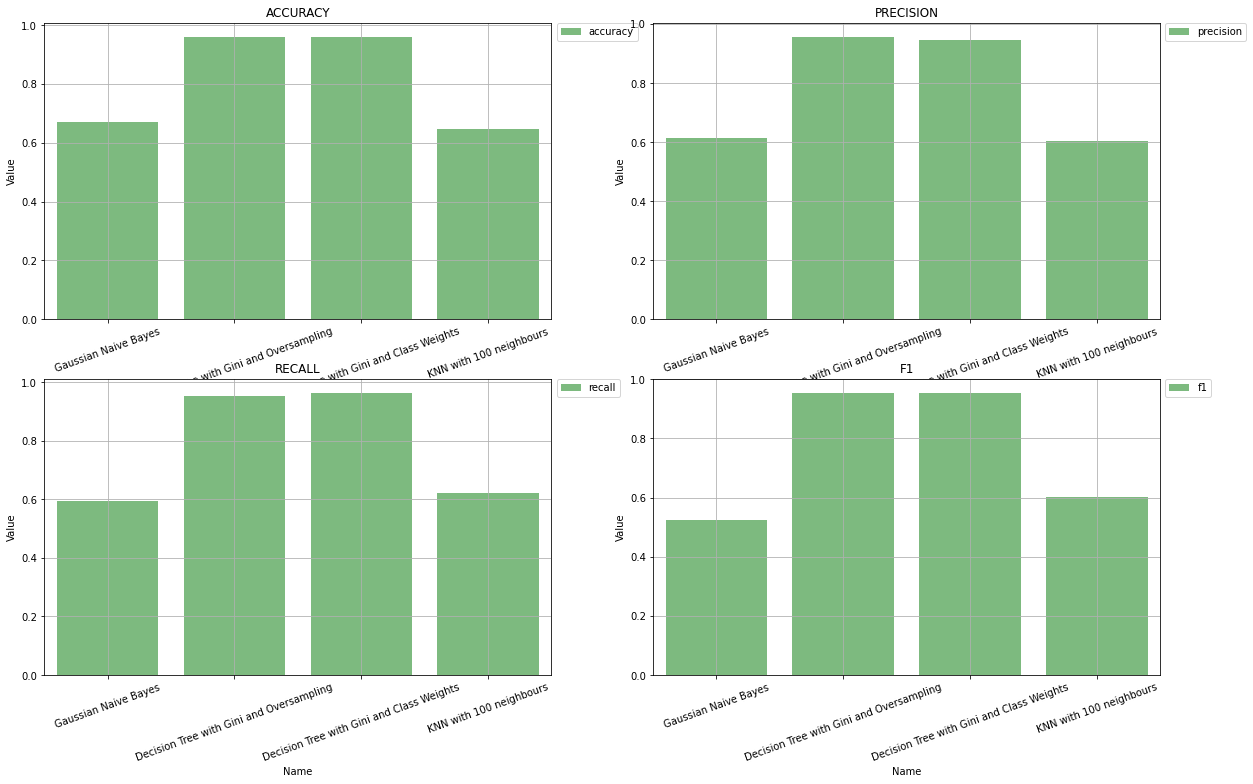

In [14]:
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = df.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(20, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]
    
    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux, palette = 'Greens')
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()

Obteniendo Matriz de Confusión de: Gaussian Naive Bayes
Obteniendo Matriz de Confusión de: Decision Tree with Gini and Oversampling
Obteniendo Matriz de Confusión de: Decision Tree with Gini and Class Weights
Obteniendo Matriz de Confusión de: KNN with 100 neighbours


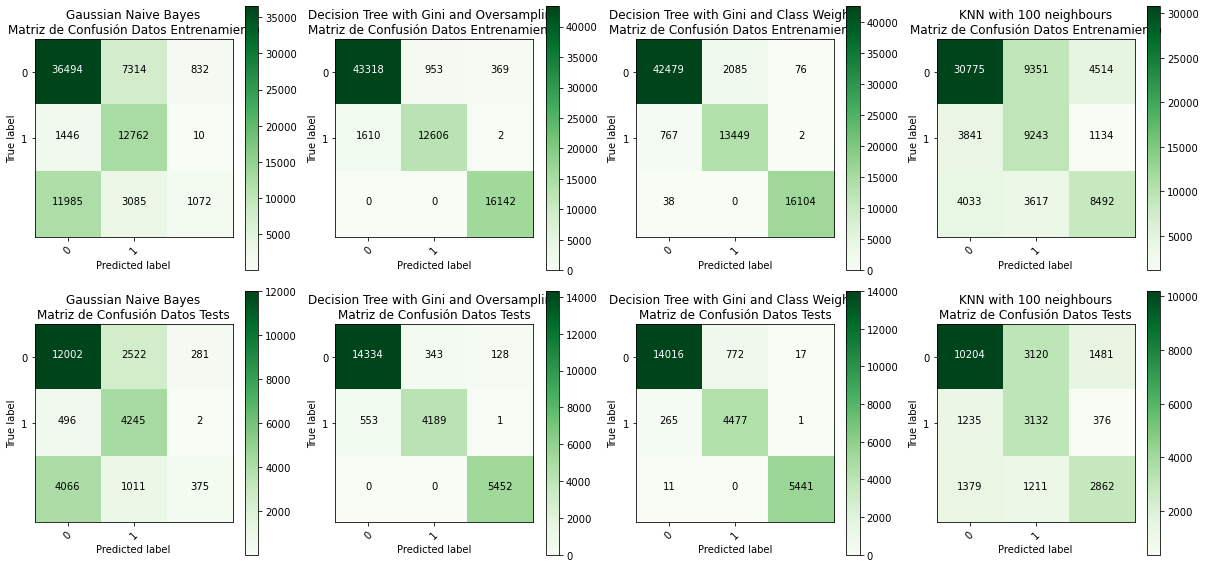

In [15]:
import numpy as np
import itertools

# Obtenemos las Matrices de confusión
msc = list()
for k, v in modelos.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    msc.append(model)

# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(25, 8))
for i, mc in enumerate(msc):
    plt.subplot(2, 6, i+1)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['0', '1'], 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    plt.subplot(2, 6, i+7)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['0', '1'], 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

<hr>

### 7. ENTRENAMIENTO DE LOS MÉTODOS ENSEMBLE



In [16]:
from xgboost import XGBClassifier, plot_tree, plot_importance
from lightgbm import LGBMClassifier

In [17]:
modelLGBM = LGBMClassifier(boosting_type ='gbdt',
                       num_leaves=31,
                       max_depth=-1,
                       learning_rate=0.1,
                       n_estimators=100,
                       subsample_for_bin=200000,
                       objective='multiclass',
                       class_weight='balanced',
                       min_split_gain=0,
                       min_child_weight=0.001,
                       min_child_samples=20,
                       subsample=1,
                       subsample_freq=0,
                       colsample_bytree=1,
                       reg_alpha=0,
                       reg_lambda=0)

modelLGBM2 = LGBMClassifier(boosting_type ='gbdt',
                       num_leaves=31,
                       max_depth=-1,
                       learning_rate=0.1,
                       n_estimators=100,
                       subsample_for_bin=200000,
                       objective='multiclass',
                       min_split_gain=0,
                       min_child_weight=0.001,
                       min_child_samples=20,
                       subsample=1,
                       subsample_freq=0,
                       colsample_bytree=1,
                       reg_alpha=0,
                       reg_lambda=0)


modelXGB = XGBClassifier(booster='gbtree', 
                          max_depth=3,  
                          eta=0.3,
                          gamma=0,
                          alpha=1,
                          min_child_weight=1,
                          max_leaves=1,
                          max_delta_step=0,
                          subsample=1,
                          colsample_bytree=1,
                          colsample_bylevel=1,
                          random_state=0)

In [18]:
modelosEnsemble = {'Método Ensemble XGB': modelXGB,
                   'Método Ensemble LGBM and Class Weights': modelLGBM,
                   'Método Ensemble LGBM and Oversampling': modelLGBM2}

start_time = time.time()

for k, v in modelosEnsemble.items():
    train_start_time = time.time()
    print ('CREANDO MODELO: {clas}'.format(clas=k))
    if k == 'Método Ensemble LGBM and Class Weights':
        v.fit(X, y)
    else:
        v.fit(X_over, y_over)
    print(f"El método Ensemble {k} ha tardado en ser entrenado: {time.time() - train_start_time} segundos\n")
        
end_time = time.time()
print(f"\nTiempo total empleado para entrenar todos los métodos Ensemble: {end_time - start_time} segundos")

CREANDO MODELO: Método Ensemble XGB
El método Ensemble Método Ensemble XGB ha tardado en ser entrenado: 15.647095203399658 segundos

CREANDO MODELO: Método Ensemble LGBM and Class Weights
El método Ensemble Método Ensemble LGBM and Class Weights ha tardado en ser entrenado: 0.8642172813415527 segundos

CREANDO MODELO: Método Ensemble LGBM and Oversampling
El método Ensemble Método Ensemble LGBM and Oversampling ha tardado en ser entrenado: 1.3207886219024658 segundos


Tiempo total empleado para entrenar todos los métodos Ensemble: 17.832101106643677 segundos


<hr>

### 8. EVALUACIÓN MÉTODOS ENSEMBLE



In [19]:
evaluacion = list()

start_time = time.time()

for k, v in modelosEnsemble.items():
    eval_start_time = time.time()
    print ('EVALUANDO MODELO: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred = v.predict(X)
    y_proba = v.predict_proba(X)
    model['accuracy'] = accuracy_score(y_true=y, y_pred=y_pred)
    model['precision'] = precision_score(y_true=y, y_pred=y_pred, average='macro')
    model['recall'] = recall_score(y_true=y, y_pred=y_pred, average='macro')
    model['f1'] = f1_score(y_true=y, y_pred=y_pred, average='macro')
    print(f"El método Ensemble {k} ha tardado en ser evaluado: {time.time() - eval_start_time} segundos\n")
    evaluacion.append(model)

end_time = time.time()
print(f"\nTiempo total empleado para evaluar todos los métodos Ensemble: {end_time - start_time} segundos")
    
# Pasamos los resultados a un DataFrame para visualizarlos mejor
df2 = pd.DataFrame.from_dict(evaluacion)
df2.set_index("name", inplace=True)
df2.head()

EVALUANDO MODELO: Método Ensemble XGB
El método Ensemble Método Ensemble XGB ha tardado en ser evaluado: 0.23044300079345703 segundos

EVALUANDO MODELO: Método Ensemble LGBM and Class Weights
El método Ensemble Método Ensemble LGBM and Class Weights ha tardado en ser evaluado: 0.5309934616088867 segundos

EVALUANDO MODELO: Método Ensemble LGBM and Oversampling
El método Ensemble Método Ensemble LGBM and Oversampling ha tardado en ser evaluado: 0.5183389186859131 segundos


Tiempo total empleado para evaluar todos los métodos Ensemble: 1.2797753810882568 segundos


,accuracy,precision,recall,f1
name,,,,
Método Ensemble XGB,0.97885,0.975188,0.975907,0.975546
Método Ensemble LGBM and Class Weights,0.98236,0.977581,0.981907,0.979712
Método Ensemble LGBM and Oversampling,0.98206,0.978849,0.979622,0.979235


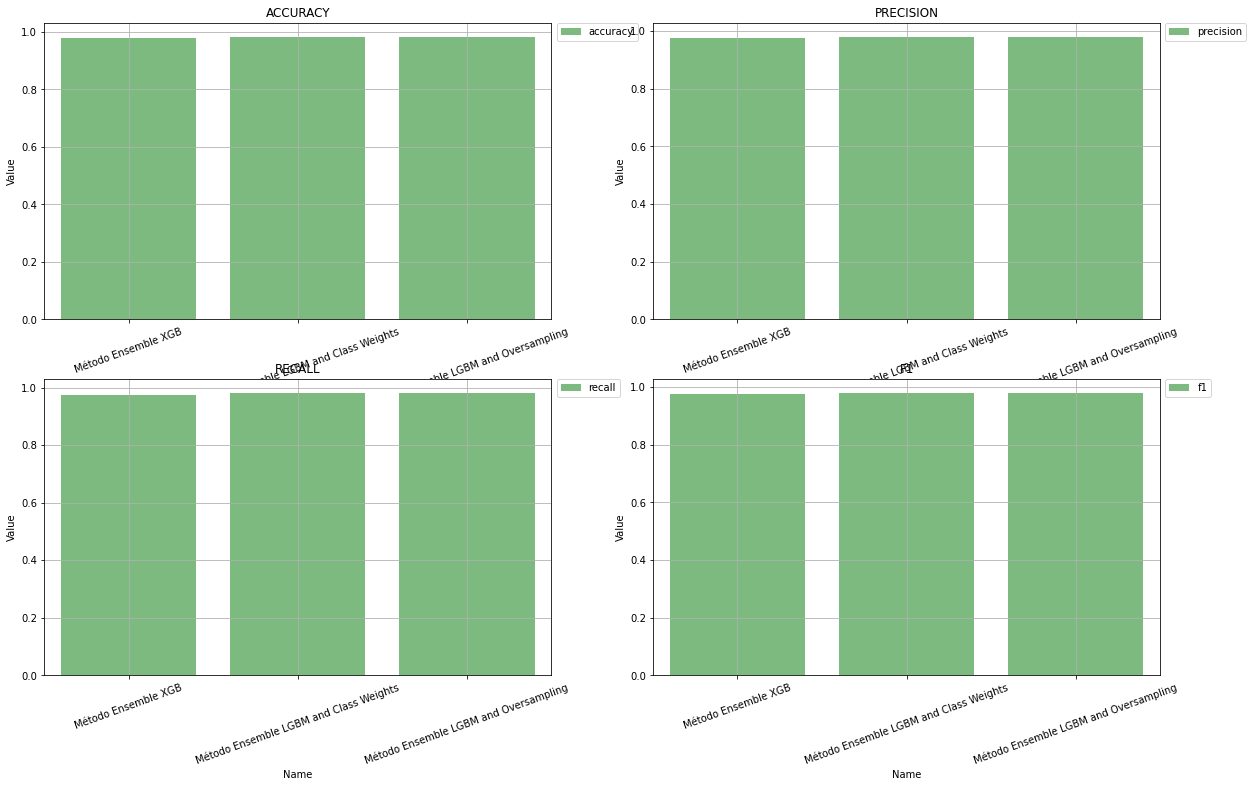

In [20]:
METRICS = ["accuracy", "precision", "recall", "f1"]

# Transformamos el dataframe para pintar las gráficas con seaborn
df_plot = df2.reset_index().melt(id_vars='name').rename(columns=str.title)

plt.figure(figsize=(20, 12))
pos = 1
for metric in METRICS:
    # Filtramos la métrica a pintar
    df_aux = df_plot[df_plot['Variable'].str.contains(metric)]
    
    # Pintamos la gráfica en su posición 2x2
    plt.subplot(2, 2, pos)
    sns.barplot(x='Name', y='Value', hue='Variable', data=df_aux, palette = 'Greens')
    plt.title(metric.upper())
    plt.grid()
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation=20)
    pos += 1
plt.show()

Obteniendo Matriz de Confusión de: Método Ensemble XGB
Obteniendo Matriz de Confusión de: Método Ensemble LGBM and Class Weights
Obteniendo Matriz de Confusión de: Método Ensemble LGBM and Oversampling


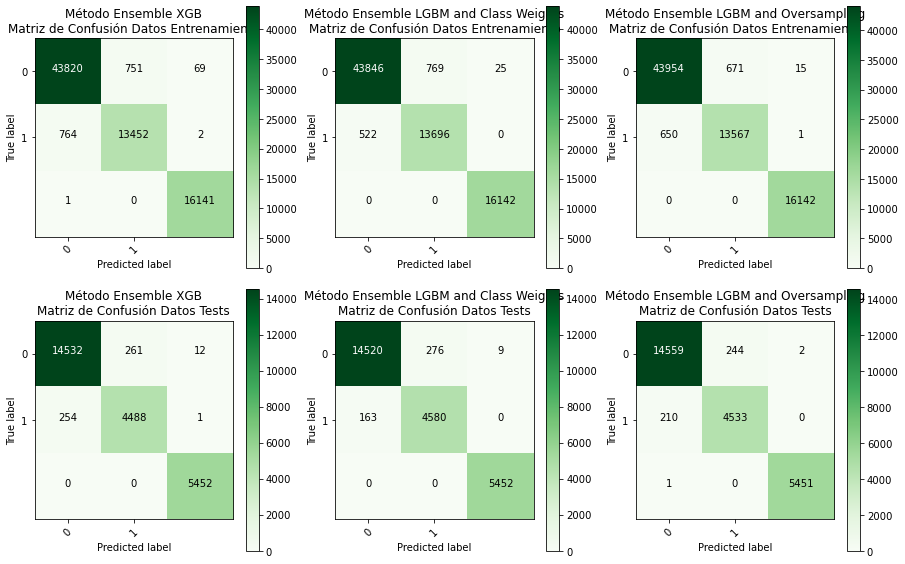

In [21]:
msc = list()
for k, v in modelosEnsemble.items():
    print ('Obteniendo Matriz de Confusión de: {model}'.format(model=k))
    model = {}
    model['name'] = k
    y_pred_train = v.predict(X_train)
    y_pred_test = v.predict(X_test)
    model['confusion_matrix_train'] = confusion_matrix(y_true=y_train, y_pred=y_pred_train)
    model['confusion_matrix_test'] = confusion_matrix(y_true=y_test, y_pred=y_pred_test)
    msc.append(model)

# Definimos el heatmap de la matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Pintamos las matrices de confusión
plt.figure(figsize=(25, 8))
for i, mc in enumerate(msc):
    plt.subplot(2, 6, i+1)
    plot_confusion_matrix(mc['confusion_matrix_train'], classes=['0', '1'], 
                          title='{}\nMatriz de Confusión Datos Entrenamiento'.format(mc['name']))
    plt.subplot(2, 6, i+7)
    plot_confusion_matrix(mc['confusion_matrix_test'], classes=['0', '1'], 
                          title='{}\nMatriz de Confusión Datos Tests'.format(mc['name'] ))
plt.show()

<hr>

### 9. CONCLUSIONES



* El conjunto de datos empleado tiene un gran desbalanceo de las clases a predecir, lo cual implica que se tendrán que utilizar técnicas para balancear los datos.
* Todas las columnas del dataset son de tipo numérico excepto la clase a predecir, por lo que se tiene que utilizar un LabelEncoder para pasar de una etiqueta de texto a una etiqueta numérica para poder emplear los modelos.
* Se utilizará oversampling y class weights como métodos de balanceo, y se compararán los resultados obtenidos. No se utilizará undersampling, puesto que reduce notablemente la cantidad de datos con las que entrenar los modelos (en torno a un 44% menos de datos). 
* En cuanto a Gaussian Naive Bayes es el más rápido en ser entrenado. A pesar de tener un accuracy de casi el 70%, su F1-score ronda el 50%. Esto puede implicar que, a pesar de haber utilizado técnicas de oversampling, no es capaz de distinguir bien entre clases. Esto se aprecia en la matriz de confusión, donde para la clase 1 y clase 2 tiene bastantes falsos positivos, pues cataloga habitualmente como clase 0 los datos. 
* En cuanto a los árboles de decision, ya sea con Oversampling o usando Class Weights, obtienen resultados parecidos, y en ambos casos, excelentes resultados. Tienen un alto accuracy, precision, recall y f1-score, por lo que está catalogando bien los datos sin caer en etiquetar la mayoría de datos como una única clase. Sin embargo, la principal diferencia entre ambos modelos es el tiempo de entrenamiento, y hay una diferencia de 0.34 segundos, por lo que podría ser mejor utlizar el modelo de Class Weights, pues la diferencia de accuracy es minúscula, y es compensada por ganar en f1-score y tiempo.
* En cuanto a KNN, es más rápido en entrenar que los árboles, pero mucho más lento de evaluar. Además, si se tiene en cuenta que solo es 0.1 segundos más rápido que el árbol de decisión con Class Weights, y obtiene malos resultados en comparación, este modelo quedaría completamente descartado para este problema.
* En cuanto a los métodos Ensemble, los tres obtienen resultados excelentes, mejores que los de los modelos. El problema es, que salvo el método Ensemble con Class Weights, el resto son bastante más lentos de entrenar que el árbol de decisión con Class Weights, y la mejora no es tan considerable. Sin embargo, el método LGBM con Class Weights solo tarda 0.1 segundos más en entrenar que el modelo mencionado, por lo cual, es una de las mejores opciones para este problema.
* Es normal que los modelos que utilicen Class Weights tarden menos, pues están entrenando con 78335 datos más.
* A la hora de escoger el mejor modelo, está entre árbol de decision con Class Weights y LGBM con Class Weights. Aquí se debe decidir que prima es más importante, si que tarde en ejecutar algo menos o si se necesita una precisión a la hora de clasificar algo mayor.

A continuación, se van a realizar las predicciones sobre todo el dataframe con los modelos elegidos, Decision Tree con Class Weights y LGBM con Class Weights

<hr>

### 10. PREDICCIÓN CON LOS MODELOS ELEGIDOS



In [22]:
pred1 = modelos['Decision Tree with Gini and Class Weights'].predict(X)
pred2 = modelosEnsemble['Método Ensemble LGBM and Class Weights'].predict(X)

dataframe['predDT'] = pred1
dataframe['predLGBM'] = pred2

In [23]:
dataframe.head(20)

,alpha,delta,u,g,r,i,z,field_ID,redshift,plate,MJD,fiber_ID,class,predDT,predLGBM
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,79,0.634794,5812,56354,171,0,0,0
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,119,0.779136,10445,58158,427,0,0,0
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,120,0.644195,4576,55592,299,0,0,0
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,214,0.932346,9149,58039,775,0,0,0
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,137,0.116123,6121,56187,842,0,0,0
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,110,1.424659,5026,55855,741,1,1,1
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,462,0.586455,11069,58456,113,1,1,1
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,346,0.477009,6183,56210,15,0,0,0
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,108,0.660012,6625,56386,719,0,0,0
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,122,-0.000008,2444,54082,232,2,2,2
